<a href="https://colab.research.google.com/github/Itallo0708/Analysis-of-Algorithms/blob/main/Tarefa01/trabalho_01_analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 4)

No algoritmo Insertion Sort, a cada iteração $j$ o subarranjo:

$$
A[1 \dots j-1]
$$

encontra-se ordenado, o que permite substituir a pesquisa linear do laço `while` por uma busca binária, reduzindo o número de comparações necessárias para encontrar a posição correta de inserção da chave. Com a busca binária, o custo para localizar a posição de inserção cai de $\Theta(j)$ para $\Theta(\log j)$.

Entretanto, mesmo conhecendo exatamente a posição correta, o algoritmo ainda precisa deslocar os elementos maiores que a chave uma posição à direita para abrir espaço no vetor. No pior caso, esse deslocamento envolve até $j-1$ elementos, o que nos custa:

$$
\text{Custo de Deslocamento} = \Theta(j)
$$

Assim, o custo total de cada iteração é dominado pelas movimentações de elementos, pois $\Theta(j) > \Theta(\log j)$. No pior caso, o tempo de execução total é dado por:

$$
T(n) = \sum_{j=2}^{n} (\underbrace{\Theta(\log j)}_{\text{Busca}} + \underbrace{\Theta(j)}_{\text{Deslocamento}}) \approx\sum_{j=2}^{n} j = \frac{n(n+1)}{2} - 1 = \Theta(n^2)
$$

Portanto, a substituição da busca linear por busca binária reduz apenas o número de comparações, mas não altera a complexidade assintótica do Insertion Sort no pior caso, que permanece $\Theta(n^2)$. Dessa forma, não é possível melhorar o tempo de execução global do pior caso para $\Theta(n \log n)$ apenas com essa modificação.


# Questão 6)

In [32]:
import time
import copy
import time
import copy
import random
import pandas as pd
import matplotlib.pyplot as plt

# Implementação Heapsoart recursivo


In [33]:
def heapsort_recursivo(vetor_in):
  # cópia da lista original
  lista = copy.copy(vetor_in)
  n = len(lista)

  # contadores
  comparacoes = 0
  trocas = 0
  inicio = time.perf_counter()

  def max_heap(n, i):
    nonlocal comparacoes, trocas
    maior = i
    esquerda = 2 * i + 1
    direita = 2 * i + 2

    # verificações dos filhos
    if esquerda < n :
      comparacoes += 1
      if lista[esquerda] > lista[maior]:
        maior = esquerda

    if direita < n:
      comparacoes += 1
      if lista[direita] > lista[maior]:
        maior = direita

    # troca se um dos filhos for maior
    if maior != i:
      lista[i], lista[maior] = lista[maior], lista[i]
      trocas += 1

      max_heap(n, maior)
  for i in range(n // 2 -1, -1, -1):
    max_heap(n, i)

  for i in range(n - 1, 0, -1):
    lista[i], lista[0] = lista[0], lista[i]
    trocas += 1

    max_heap(i, 0)
  fim = time.perf_counter()
  return fim - inicio, comparacoes, trocas

# Algoritmo de Benchmark utilizado

In [34]:
def executar_benchmark_media(tamanhos, num_execucoes=5):
    resultados = []

    print(f"Iniciando benchmark com média de {num_execucoes} execuções por cenário...")

    for tamanho in tamanhos:
        acumulado = {
            'Aleatório': {'tempo': 0.0, 'comps': 0, 'trocas': 0},
            'Inverso':   {'tempo': 0.0, 'comps': 0, 'trocas': 0},
            'Ordenado':  {'tempo': 0.0, 'comps': 0, 'trocas': 0}
        }

        for _ in range(num_execucoes):
            dados_base = list(range(tamanho))

            # Gera os dados para os cenários
            cenarios = {
                'Aleatório': random.sample(dados_base, tamanho),
                'Inverso': dados_base[::-1],
                'Ordenado': dados_base
            }

            for nome_cenario, dados in cenarios.items():
                tempo, comps, trocas = heapsort_recursivo(dados)

                acumulado[nome_cenario]['tempo'] += tempo
                acumulado[nome_cenario]['comps'] += comps
                acumulado[nome_cenario]['trocas'] += trocas

        # Calcula a média
        for nome_cenario, metricas in acumulado.items():
            resultados.append({
                'Cenario': nome_cenario,
                'Tamanho': tamanho,
                'Tempo': metricas['tempo'] / num_execucoes,
                'Comparacoes': int(metricas['comps'] / num_execucoes),
                'Trocas': int(metricas['trocas'] / num_execucoes)
            })

    return pd.DataFrame(resultados)

# Testes Heapsort Recursivo

Iniciando benchmark com média de 5 execuções por cenário...

--- Tabela de Resultados (Média de 5 execuções) ---


,Cenario,Tamanho,Tempo,Comparacoes,Trocas
1,Aleatório,100,0.000230,1028,585
2,Inverso,100,0.000157,944,516
3,Ordenado,100,0.000190,1081,640
4,Aleatório,1000,0.003295,16858,9084
5,Inverso,1000,0.003118,15965,8316
6,Ordenado,1000,0.003686,17583,9708
7,Aleatório,2000,0.006963,37701,20158
8,Inverso,2000,0.006396,35964,18708
9,Ordenado,2000,0.007298,39159,21300
10,Aleatório,5000,0.020864,107712,57126


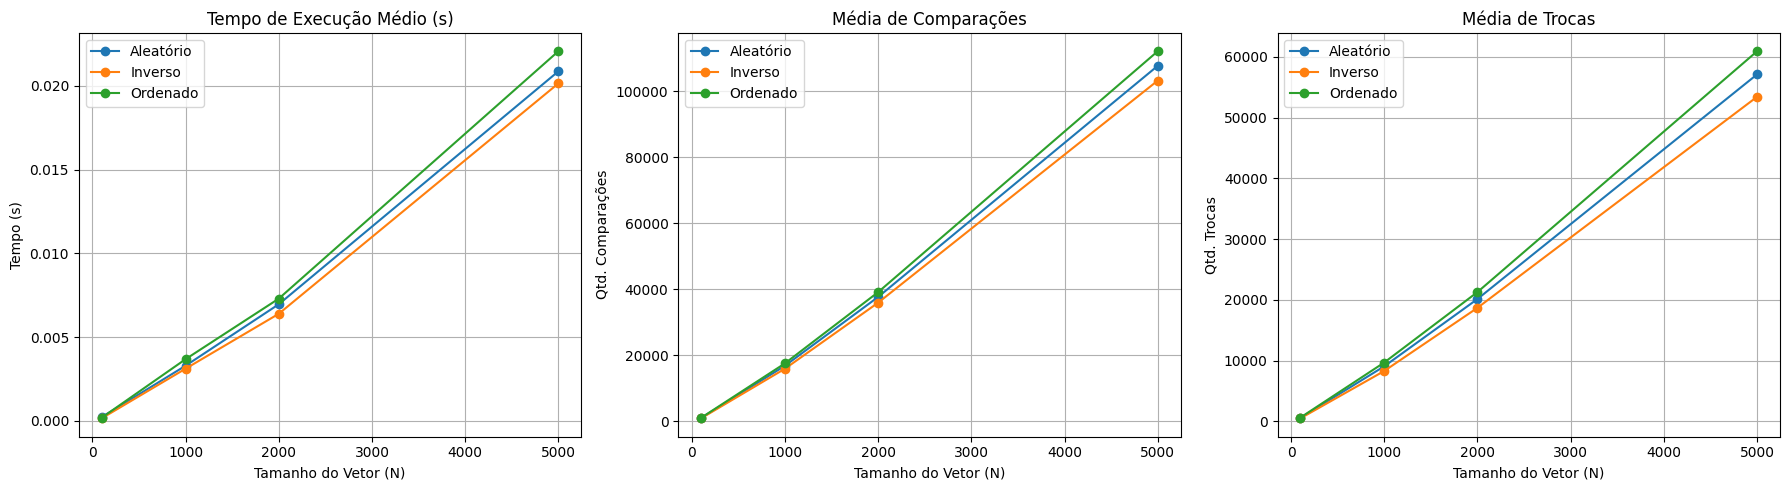

In [35]:
tamanhos_teste = [100, 1000, 2000, 5000]

df_media = executar_benchmark_media(tamanhos_teste, num_execucoes=5)
df_media.index = df_media.index + 1

# Printa a tabela
print("\n--- Tabela de Resultados (Média de 5 execuções) ---")
display(df_media)

# Gera os Gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metricas_visuais = [
    ('Tempo', 'Tempo de Execução Médio (s)', 'Tempo (s)'),
    ('Comparacoes', 'Média de Comparações', 'Qtd. Comparações'),
    ('Trocas', 'Média de Trocas', 'Qtd. Trocas')
]

for i, (coluna, titulo, ylabel) in enumerate(metricas_visuais):
    ax = axes[i]
    for cenario in df_media['Cenario'].unique():
        df_f = df_media[df_media['Cenario'] == cenario]
        ax.plot(df_f['Tamanho'], df_f[coluna], marker='o', label=cenario)

    ax.set_title(titulo)
    ax.set_xlabel('Tamanho do Vetor (N)')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# 1. Listagem dos testes executados

Dimensões dos Vetores (N): Os testes foram escalonados para observar o crescimento assintótico, utilizando vetores de tamanho:
$$ N = 100
$$
$$ N = 1000
$$
$$ N = 2000
$$
$$ N = 5000
$$

# 1.1 Cenários de teste
Optou-se por gerar os dados dinamicamente via código, utilizando a biblioteca random, em vez de ler arquivos estáticos externos. Essa decisão foi tomada para permitir múltiplas execuções com diferentes sementes aleatórias, garantindo resultados mais confiáveis.

Para cada tamanho $N$, o algoritmo foi submetido a três disposições de dados distintas:

**Aleatório:** Vetores com elementos embaralhados randomicamente

**Ordenado:** Vetores preenchidos sequencialmente de $0$ a $N-1$

**Inverso:** Vetores preenchidos de $N-1$ até $0$
# 1.2 Métricas Analisadas
**Tempo de Execução:** Medido em segundos com precisão de microssegundos utilizando a função `time.perf_counter()`.

**Comparações:** Contagem total de comparações entre elementos do vetor.

**Trocas:** Contagem total de movimentações de elementos.
# 1.3 Metodologia
Para garantir a consistência estatística e mitigar a variação de cada execução, cada cenário foi executado 5 vezes.

Os resultados apresentados nos gráficos e tabelas representam a média aritmética dessas 5 execuções.
# 1.4 Estudo da Complexidade
O algoritmo Heap Sort possui uma complexidade de tempo robusta e consistente, classificada como $\Theta(n \log n)$ para os três casos clássicos (Pior, Médio e Melhor caso).

A etapa de construção do Heap reorganiza o vetor para satisfazer a propriedade de Max-Heap. Embora chame `Max-Heap` repetidamente, esta etapa tem custo linear $O(n)$.

Já na etapa de extração e ordenação, o laço principal executa $n-1$ vezes. Em cada iteração, o maior elemento é removido e a função `Max-Heap` é chamada para restaurar a estrutura. Como a altura da árvore binária é $\lfloor \lg n \rfloor$, o custo de cada restauração é $O(\lg n)$. O custo total desta fase é, portanto, $O(n \log n)$.

Somando as etapas, a complexidade total é dominada pela ordenação: $$T(n) = O(n) + O(n \log n) = \Theta(n \log n)$$
# 1.5 Análise dos Cenários de teste
**Cenário "Inverso":** Apresentou o menor tempo de execução e número de trocas. Pois, O Heap Sort utiliza uma estrutura de Max-Heap (onde o Pai deve ser maior que os Filhos). Um vetor decrescente (ex: [5, 4, 3, 2, 1]) já satisfaz naturalmente essa propriedade em quase todos os nós. Consequentemente, a etapa inicial de construção realiza menos trocas, economizando tempo de CPU.

**Cenário "Ordenado":** Apresentou o maior tempo de execução.Pois, Um vetor crescente (ex: [1, 2, 3, 4, 5]) representa o estado oposto a um Max-Heap. Isso força o algoritmo a realizar o número máximo possível de movimentações durante a fase de construção para inverter a estrutura da árvore antes de começar a ordenar, resultando no pior caso prático para a etapa de construção.

**Cenário Aleatório:** Apresentou um desempenho muito estável. Dessa forma, A proximidade da sua curva com as demais confirma que, para o Heap Sort, o caso médio é assintoticamente equivalente ao pior caso.

# 1.6 Análise dos Gráficos
A curva de tempo de execução em função do tamanho da entrada ($N$) apresenta um crescimento suave, compatível com a função $N \log N$. Não houve degradação para comportamentos quadráticos ($N^2$) em nenhum cenário, o que valida a eficiência do algoritmo para grandes volumes de dados. Diferentemente de algoritmos como o Quick Sort ou Insertion Sort, cujos tempos variam drasticamente dependendo da ordenação inicial, o Heap Sort apresentou tempos de execução asintoticamente iguais.

Portanto, conclui-se empiricamente que para valores de $N$ suficientemente grandes, o desempenho do algoritmo converge para $\Theta(n \log n)$ independentemente da disposição inicial dos dados, confirmando a consistência do Heap Sort.
